# Recherche textuelle : l'algorithme de Boyer Moore

Les algorithmes de recherche textuelle permettent de trouver une sous-chaine de caractère dans une chaine de caractères plus
grande. Ce sont des "classiques" de l'algorithmique L'algorithme de Boyer-Moore permet une telle recherche. Il a été développé en 1977.
 
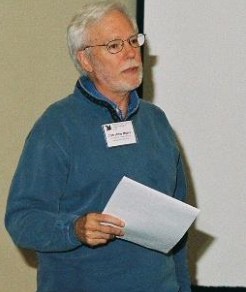

La recherche d'un motif (pattern en anglais) dans une chaîne de caractère a de nombreuses applications concrètes :  
* moteur de recherche
* recherche de séquences d'ADN
* anti-spam
* interception de communications (Echelon)
* ...  


Python, comme de nombreux autres langages de programmation dits « de haut  niveau », offre de tels outils de recherche, en particulier l’opérateur in et la méthode  index des chaînes de caractères.
 - L'opérateur **in**  utilisé entre deux chaînes de caractères retourne  utilisé entre deux chaînes de caractères retourne  True si la  première est contenue dans la deuxième : 

`
"ion Py" in 'Programmation Python' # > évalué à True
`

`
"princess" in "This castle"        # > évalué à False
`

- La méthode  **index(sub:str)** de la classe str retourne l’indice de la première occurrence de sub  dans la chaîne de caractères à partir de laquelle elle est appelée  et produit une erreur si elle ne s’y trouve pas :

`
"Programmation Python".index("ion Py") #> retourne 10
`

`
"This castle".index("princess")   #> erreur "ValueError: substring not found"
`

## 1. Un exemple de recherche textuelle
Intéressons nous aux animaux qui interviennent dans les fables de La Fontaine (1621 - 1695). <br>Pour ce faire, commencer par charger le recueil en exécutant la cellule suivante.

In [ ]:
fichier = open('lafontaine.txt', 'r', encoding='utf-8-sig') 
fables = fichier.read()
fichier.close()

Ce fichier texte est vu comme une longue chaîne de caractères dont on peut récupérer la taille :

In [ ]:
len(fables)


In [ ]:
fichier = open('lafontaine.txt', 'rb') 
fables_b = fichier.read()
fichier.close()
len(fables_b)

Dans cette chaîne de caractères, de type ***str***, on peut rechercher la présence de chaînes de caractères de plus petites tailles que l'on appellera des motifs.<br>
La méthode ***find(motif)*** retourne le premier indice d'apparition du motif dans la chaîne, et **-1 si le motif n'existe pas** dans cette chaîne. <br>
On peut ainsi s'intéresser aux animaux présents dans le livre.

In [ ]:
fables.find("Camille")


In [ ]:

fables.find("Thiss")

In [ ]:
fables.find("Baptistou")

In [ ]:
fables.find("lion")

In [ ]:
fables.find("renard")

In [ ]:
fables[14686:14690]

On peut même s'intéresser à ce qui suit le motif repéré …

In [ ]:
fables[14674:14700]

On peut aussi s'intéresser au nombre d'occurences d'un motif particulier.

<div class="alert alert-info"><b>Exercice 1</b><br/>
    
Ecrivez une fonction `nbOccurences(texte, motif)` qui prend en argument une chaine de caractère `texte` correspondant à un texte et une chaine de caractère `motif` correspondant au motif à rechercher dans `texte` .  
La fonction renvoie le nombre d'occurences de `motif` dans `texte`.

In [ ]:
def nbOccurences(texte, motif):
    compteur, i = 0, 0
    while True:
        occurrence = ...              # occurrence est l'index du sous-texte à partir de l'index i
        if occurrence == -1:
            return compteur
        else:
            compteur  = ... 
            i = ...

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div> 

```
def nbOccurences(texte, motif):
    compteur, i = 0, 0
    while True:
        occurrence = texte.find(motif, i)
        # occurrence est l'index du sous-texte à partir de l'index i
        if occurrence == -1:
            return compteur
        else:
            compteur += 1
            i = occurrence + 1 
```
    
</div>

In [ ]:
nbOccurences("abnnnabnnabnnab","ab")

In [ ]:
nbOccurences(fables, "lion")

In [ ]:
nbOccurences(fables, "renard")

In [ ]:
nbOccurences(fables, "chien")

In [ ]:
nbOccurences(fables, "singe")

In [ ]:
nbOccurences(fables, "e")

<div class="alert alert-info"><b>Exercice 2</b><br/>
    
1. Importer le fichier texte `la_disparition.txt` qui propose un extrait du roman « La Disparition » écrit en 1968
par l’écrivain français Georges Perec (1936-1982) et publié en 1969.    
2. Essayer votre fonction de recherche sur ce texte avec quelques mots comme `envie`, `esprit`, `est`, `les`. Puis
avec la lettre `e`, Que remarquez-vous ?

In [ ]:
fichier = open("la_disparition.txt",'r',encoding='utf8')
roman = fichier.read()
fichier.close()

In [ ]:
nbOccurences(roman, "e")

Nous allons dans la suite essayer de trouver comment la méthode `.find(motif)` fonctionne.  
C'est à dire comment détecter la première occurence d'une chaîne de caractères ***motif*** de longueur ***p*** dans un texte de longueur ***n*** avec ***n*** > ***p***.

## 2. Algorithme naïf  

Ci-dessous, une illustration du fonctionnement de l'algorithme de recherche naïve.

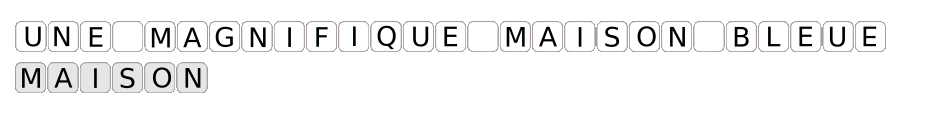

Autre exemple : Le motif **_roseraie_** est-il présent dans la chaîne de caractère suivante : **_Cueillez dès aujourd’hui les roses de la vie_** ?

Une approche naïve est la suivante:

|C|u|e|i|l|l|e|z| |d|è|s| |a|u|j|o|u|r|d|’|h|u|i| |l|e|s| |r|o|s|e|s| |d|e| |l|a| |v|i|e|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|r|o|s|e|r|a|i|e| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

C et r sont différents on décale alors le mot _roseraie_,

|C|u|e|i|l|l|e|z| |d|è|s| |a|u|j|o|u|r|d|’|h|u|i| |l|e|s| |r|o|s|e|s| |d|e| |l|a| |v|i|e|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| |r|o|s|e|r|a|i|e| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

u et r ne correspondent pas

on décale jusqu'à obtenir la première correspondance,

|C|u|e|i|l|l|e|z| |d|è|s| |a|u|j|o|u|r|d|’|h|u|i| |l|e|s| |r|o|s|e|s| |d|e| |l|a| |v|i|e|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | | | | | | | | | | | |**r**|o|s|e|r|a|i|e| | | | | | | | | | | | | | | | | | |

ici il y a bien correspondance entre _r_ et _r_, il faut donc comparer la lettre suivante. _d_ et _o_ ne correspondent pas, on continue le décalage...,

|C|u|e|i|l|l|e|z| |d|è|s| |a|u|j|o|u|r|d|’|h|u|i| |l|e|s| |r|o|s|e|s| |d|e| |l|a| |v|i|e|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | | | | | | | | | | | | | | | | | | | | | | |**r**|**o**|**s**|**e**|r|a|i|e| | | | | | | |  

ici c'est le s et le r qui ne correspondent pas


Cette approche consiste donc à faire une **comparaison lettre à lettre** .  
Cette recherche peut se poursuivre jusqu'à la fin de la chaine.

### Coût de cet algorithme
Elle est difficile à estimer car elle dépend du motif et de la chaine elle-même.  

Dans notre exemple, le meilleur des cas serait celui ou la lettre `r` du motif n'est pas dans la chaine.
Dans ce cas, on ne compare que la 1ère lettre du motif avec chacun des caractères de la chaine. 

On appelle  $M$ la longeur du motif et $T$ la longeur du texte. Dans le cas décrit ci-dessus, on fait alors ($T$ - $M$) décalages. 

|C|u|e|i|l|l|e|z| |d|è|s| |a|u|j|o|u|r|d|’|h|u|i| |l|e|s| |r|o|s|e|s| |d|e| |l|a| |v|i|e|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |**r**|**o**|**s**|**e**|r|a|i|e 

En effet, on a décalé jusqu'à la dernière position possible (après les lettres du motif "dépasse" du texte), cette position correspond bien à $T$ - $M$.  

Imaginons maintenant le cas suivant ou la chaine est :  
`aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa`  

et le motif est :  
`aaaaaaaaaaab` 

Dans ce cas, on compare la 1ère lettre du motif à la 1ère lettre de la chaine, il y a correspondance, puis la 2ème à la chaine, cela correspond, puis la 3ème à la chaine, cela correspond etc... jusqu'à arriver au b.
Dans ce cas on a fait **M comparaisons**.  
On décale d'un cran et on recommence toutes les comparaisons précédentes. 

**Combien de décalages et de comparaisons l'algorithme a-t-il réalisé ?**

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div> 

$M$ comparaisons pour $T$ - $M$ décalages soit ($T$ - $M$) x $M$.  
On approximera ce résultat à $T$ x $M$ car très souvent $T$ >> $M$
    
</div>

<div class="alert alert-info"><b>Exercice 3</b><br/>
    
Compléter la fonction `recherche_naive(texte, motif)` qui prend en paramètres le texte sous forme de chaîne de caractères `texte` et la chaîne de caractères recherchée `motif` et renvoie la liste des indices (éventuellement vide)  des occurences de `motif`dans `texte`.  

</div>

In [ ]:
# Rech naive eleve
def recherche_naive(texte, motif):
    '''
    renvoie la liste des indices (éventuellement vide) des occurrences de
    de la chaîne `motif` dans la chaîne `texte`.
    '''
    indices = []
    i = 0 # indice dans texte
    while i <= ... : # i doit permettre la recherche du motif jusqu'à la fin du texte
        k = 0 # indice dans motif
        while k < ... and texte[...] == motif[...]: # conditions pour modifier k et donc avancer dans la recherche
            k += 1
        if k == len(motif):
            indices.append(...)
        i += ...
    return indices

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div>

```python
def recherche_naive(texte, motif):
    '''renvoie la liste des indices (éventuellement vide) des occurrences de de la chaîne `motif` dans la chaîne `texte`.
    '''
    indices = []
    i = 0 # indice dans texte
    while i <= len(texte)-len(motif) : 
            # i doit permettre la recherche du motif jusqu à la fin du texte
        k = 0 # indice dans motif
        while k < len(motif) and texte[i+k] == motif[k]: 
         # conditions pour modifier k et donc avancer dans la recherche
            k += 1
        if k == len(motif):
            indices.append(i)
        i += 1
    return indices
    
```
    
</div>

In [ ]:
texte = "Cueillez dès aujourd’hui les roses de la vie"
motif = "rose"
print(recherche_naive(texte, motif))

In [ ]:
texte = "Cueillez dès aujourd’hui les roses de la vie"
motif = "rose"
print(recherche_naive(texte, motif))

print(recherche_naive("une magnifique maison bleue", "maison"))

print(recherche_naive("une magnifique maison bleue", "nsi"))

print(recherche_naive("une magnifique maison bleue", "ma"))


<div class="alert alert-info"><b>Exercice 3</b><br/>

Re-écrire l'algorithme précédent en s'arrêtant dès qu'une occurrence de motif est trouvée dans texte.

La fonction renverra uniquement un booléen.

In [ ]:
print(recherche_naive_modif("une magnifique maison bleue", "maison"))

print(recherche_naive_modif("une magnifique maison bleue", "nsi"))

print(recherche_naive_modif("une magnifique maison bleue", "ma"))

In [ ]:
texte = "Cueillez dès aujourd’hui les roses de la vie"
motif = "rose"
print(recherche_naive_modif(texte, motif))

print(recherche_naive_modif("une magnifique maison bleue", "maison"))

print(recherche_naive_modif("une magnifique maison bleue", "nsi"))

print(recherche_naive_modif("une magnifique maison bleue", "ma"))

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div>

```python
def recherche_naive_modif(texte, motif):
    '''
    renvoie la liste des indices (éventuellement vide) des occurrences de
    de la chaîne `motif` dans la chaîne `texte`.
    '''
    i = 0
    while i <= len(texte) - len(motif):
        k = 0
        while k < len(motif) and texte[i+k] == motif[k]:
            k += 1
        if k == len(motif):
            return True
        i += 1
    return False
    
```
    
</div>

À l'aide du module time, mesurer le temps de recherche dans Les fables de Lafontaine d'un mot court, d'une longue phrase (présente dans le texte), d'un mot qui n'existe pas.  
**Que remarquez-vous ?**

In [ ]:
# votre code

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div>

```python
import time


with open('lafontaine.txt', 'r', encoding='utf-8-sig') as f:
    fables = f.read().replace('\n', ' ')


def recherche_naive(texte, motif):
    '''
    renvoie la liste des indices (éventuellement vide) des occurrences de
    de la chaîne `motif` dans la chaîne `texte`.
    '''
    indices = []
    i = 0
    while i <= len(texte) - len(motif):
        k = 0
        while k < len(motif) and texte[i+k] == motif[k]:
            k += 1
        if k == len(motif):
            indices.append(i)
        i += 1

    return indices

t0 = time.time()
motif = 'maison'
print(recherche_naive(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'Desperat tractata nitescere posse relinquit'
print(recherche_naive(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'parcoursup'
print(recherche_naive(fables, motif))
print(time.time()-t0)
    
```
    
</div>

In [ ]:
import time


with open('lafontaine.txt', 'r', encoding='utf-8-sig') as f:
    fables = f.read().replace('\n', ' ')


def recherche_naive(texte, motif):
    '''
    renvoie la liste des indices (éventuellement vide) des occurrences de
    de la chaîne `motif` dans la chaîne `texte`.
    '''
    indices = []
    i = 0
    while i <= len(texte) - len(motif):
        k = 0
        while k < len(motif) and texte[i+k] == motif[k]:
            k += 1
        if k == len(motif):
            indices.append(i)
        i += 1

    return indices

t0 = time.time()
motif = 'maison'
print(recherche_naive(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'Desperat tractata nitescere posse relinquit'
print(recherche_naive(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'parcoursup'
print(recherche_naive(fables, motif))
print(time.time()-t0)
    


In [ ]:
t0 = time.time()
motif = 'maison'
print(recherche_naive(fables, motif))
print(time.time()-t0)

In [ ]:
t0 = time.time()
motif = 'Desperat tractata nitescere posse relinquit'
print(recherche_naive(fables, motif))
print(time.time()-t0)

In [ ]:
t0 = time.time()
motif = 'parcoursup'
print(recherche_naive(fables, motif))
print(time.time()-t0)

## 3. Algorithme naïf mais en partant à l'envers.  
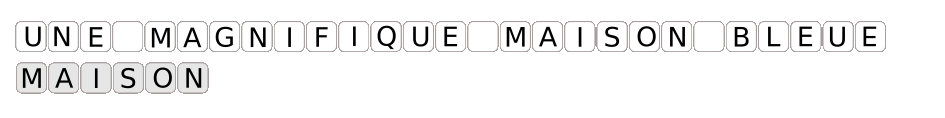  

Même si cela parait curieux de faire ainsi, cette manière de faire va nous servir pour l'agorithme suivant.  

<div class="alert alert-info"><b>Exercice 3</b><br/>
    
Re-écrire l'algorithme de recherche naïve mais en démarrant de la fin du motif et non du début
Re-

In [ ]:
# version eleve
def recherche_naive_envers(texte, motif):
    indices = []
    i = 0 # indice dans texte
    while i <= ...:# i doit permettre la recherche du motif jusqu'à la fin du texte
        k = ... # indice dans motif mais en partant de la fin
        while k > ... and texte[...] == motif[...]: # conditions pour modifier k et donc avancer dans la recherche
            k -= ...
        if k == i:
            indices.append(i)
        i += 1

    return indices

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div>

```python
def recherche_naive_envers(texte, motif):
    indices = []
    i = 0  # indice dans texte
    while i <= len(texte) - len(motif):  # i doit permettre la recherche du motif jusqu'à la fin du texte
        k = len(motif) - 1  # indice dans motif, en partant de la fin
        while k >= 0 and texte[i + k] == motif[k]:  # comparer de la fin vers le début
            k -= 1
        if k == -1:  # tous les caractères ont été vérifiés avec succès
            indices.append(i)
        i += 1

    return indices
```
    
</div>

In [ ]:
texte = "Cueillez dès aujourd’hui les roses de la vie"
motif = "rose"
print(recherche_naive_envers(texte, motif))

print(recherche_naive_envers("une magnifique maison bleue", "maison"))

print(recherche_naive_envers("une magnifique maison bleue", "nsi"))

print(recherche_naive_envers("une magnifique maison bleue", "ma"))

## 3. Algorithme de Boyer-Moore-Horspool  
L’algorithme de Boyer-Moore-Horspool ou Horspool est un algorithme de recherche de sous-chaîne publié en 1980
par Nigel Horspool, un professeur à l’université de Victoria au canada.  
Il consiste en une simplification de l’algorithme de Boyer-Moore (développé en 1977) qui ne garde que la première table de saut .  
Nous allons expliquer cette notion.  

### Principe  
L'idée est d'améliorer le code précédent (celui on parcourt le motif à l'envers) en sautant directement au prochain endroit potentiellement valide.  

Pour cela on regarde le caractère **`X` du texte sur lequel on s'est arrêté** (car X n'était pas égal au caractère de rang équivalent dans le motif):  
* si X n'est pas dans le motif, il est inutile de se déplacer "de 1" : on retomberait tout de suite sur X, c'est du temps perdu. On se décale donc juste assez pour dépasser X, donc de la longueur du motif cherché.  
* si X est dans le motif (sauf à la dernière place du motif !), on va regarder la place de la dernière occurence de X dans le motif et de déplacer de ce nombre, afin de faire coïncider le X du motif et le X du texte.  

**Repérez dans l'animation les deux actions précédentes.**

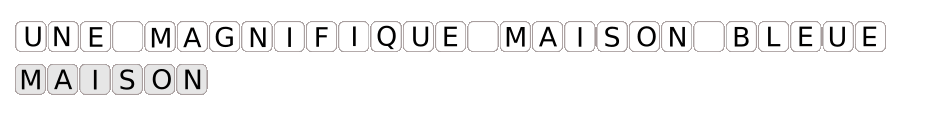

### Exemple de fonctionnement  
Reprenons le principe de l'algorithme sur un exemple de séquence d'ADN.
   
L'ADN est composé d'une séquence de 4 bases azotées:  
- Adénine (A)  
- Cytosine (C)  
- Guanine (G)  
- Thymine (T)  


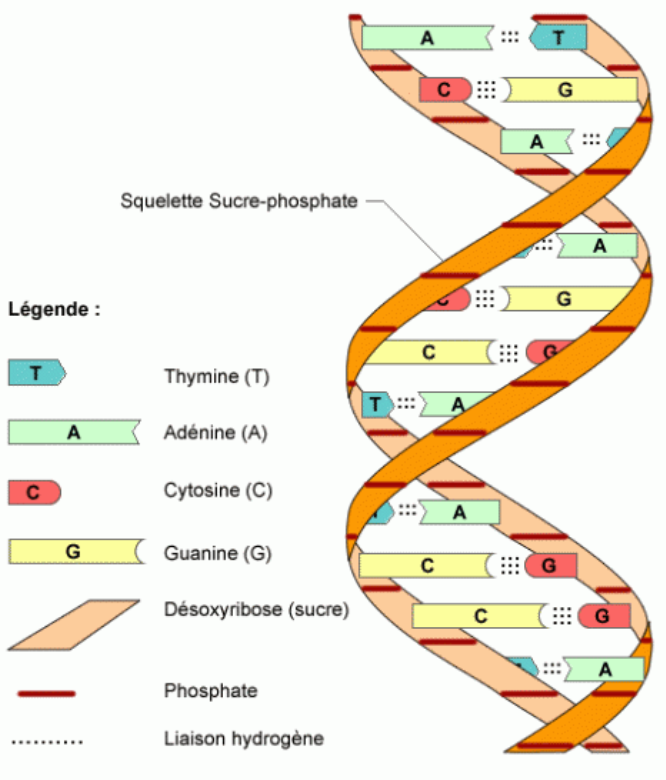

Soit la séquence suivante : _CAATGTCTGCACCAAGACGCCGGCAGGTGCAGACCTTCGTTATAGGCGATGATTTCGAACCTACTAG_  

Le motif _CGGCAG_ est-il présent dans la chaîne ?

Dans cet algorithme on regarde tout d'abord la **dernière lettre du motif puis on remonte vers la gauche.**

|C|A|A|T|G|T|C|T|G|C|A|C|C|A|A|G|A|C|G|C|C|G|G|C|A|G|G|T|G|C|A|G|A|C|C|T|T|C|G|T|T|A|T|A|G|G|C|G|A|T|G|A|T|T|T|C|G|A|A|C|C|T|A|C|T|A|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|C|G|G|C|A|**G**| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

- Y a t-il correspondance ? -> NON
  - La lettre _T_ est-elle présente dans notre motif -> NON
    - On décale donc le motif de la longeur du motif (saut maximal)

|C|A|A|T|G|T|C|T|G|C|A|C|C|A|A|G|A|C|G|C|C|G|G|C|A|G|G|T|G|C|A|G|A|C|C|T|T|C|G|T|T|A|T|A|G|G|C|G|A|T|G|A|T|T|T|C|G|A|A|C|C|T|A|C|T|A|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | |C|G|G|C|A|**G**| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

- Y a t-il correspondance ? -> NON
  - La lettre _C_ est-elle présente dans notre motif -> OUI
    - On décale donc le motif de 2 rangs pour les faire correspondre


|C|A|A|T|G|T|C|T|G|C|A|C|C|A|A|G|A|C|G|C|C|G|G|C|A|G|G|T|G|C|A|G|A|C|C|T|T|C|G|T|T|A|T|A|G|G|C|G|A|T|G|A|T|T|T|C|G|A|A|C|C|T|A|C|T|A|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | |C|G|G|C|A|**G**| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

- Y a t-il correspondance ? -> NON
  - La lettre _A_ est-elle présente dans notre motif -> OUI
    - On décale donc le motif de 1 rang pour les faire correspondre


|C|A|A|T|G|T|C|T|G|C|A|C|C|A|A|G|A|C|G|C|C|G|G|C|A|G|G|T|G|C|A|G|A|C|C|T|T|C|G|T|T|A|T|A|G|G|C|G|A|T|G|A|T|T|T|C|G|A|A|C|C|T|A|C|T|A|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | | |C|G|G|C|A|**G**| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

- Y a t-il correspondance ? -> NON
  - La lettre _A_ est-elle présente dans notre motif -> OUI
    - On décale donc le motif de 1 rang pour les faire correspondre

|C|A|A|T|G|T|C|T|G|C|A|C|C|A|A|G|A|C|G|C|C|G|G|C|A|G|G|T|G|C|A|G|A|C|C|T|T|C|G|T|T|A|T|A|G|G|C|G|A|T|G|A|T|T|T|C|G|A|A|C|C|T|A|C|T|A|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | | | |C|G|G|C|**A**|**G**| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

- Y a t-il correspondance ? -> OUI
  - On regarde la lettre du motif sur la gauche
  - Y a t-il correspondance ? -> OUI
    - On regarde la lettre du motif sur  la gauche
    - Y a t-il correspondance ? -> NON
        - La lettre _A_ est-elle présente dans notre motif -> OUI
            - On décale donc le motif de 1 rang

|C|A|A|T|G|T|C|T|G|C|A|C|C|A|A|G|A|C|G|C|C|G|G|C|A|G|G|T|G|C|A|G|A|C|C|T|T|C|G|T|T|A|T|A|G|G|C|G|A|T|G|A|T|T|T|C|G|A|A|C|C|T|A|C|T|A|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | | | | |C|G|G|C|A|G| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

- Y a t-il correspondance ? -> NON
  - La lettre _A_ est-elle présente dans notre motif -> OUI
    - On décale donc le motif de 1 rang pour les faire correspondre

|C|A|A|T|G|T|C|T|G|C|A|C|C|A|A|G|A|C|G|C|C|G|G|C|A|G|G|T|G|C|A|G|A|C|C|T|T|C|G|T|T|A|T|A|G|G|C|G|A|T|G|A|T|T|T|C|G|A|A|C|C|T|A|C|T|A|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | | | | | |C|G|G|C|A|G| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |


**etc etc...**

|C|A|A|T|G|T|C|T|G|C|A|C|C|A|A|G|A|C|G|C|C|G|G|C|A|G|G|T|G|C|A|G|A|C|C|T|T|C|G|T|T|A|T|A|G|G|C|G|A|T|G|A|T|T|T|C|G|A|A|C|C|T|A|C|T|A|G|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
| | | | | | | | | | | | | | | | | | | | |**C**|**G**|**G**|**C**|**A**|**G**| | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | |

- Y a t-il correspondance ? -> OUI
  - On regarde la lettre du motif sur la gauche
  - Y a t-il correspondance ? -> OUI
    - On regarde la lettre du motif sur la gauche
    - ...

**Le motif est donc présent dans notre chaîne.**


Vous pouvez voir l'algorithme animé : https://boyer-moore.codekodo.net/recherche_boyer.php 

Entrer le texte (Text) : `CAATGTCTGCACCAAGACGCCGGCAGGTGCAGACCTTCGTTATAGGCGATGATTTCGAACCTACTAG`   
Entrer le motif (pattern) : `CGGCAG`  
Cliquer sur Search  

### Explications
Dans la méthode naïve, les décalages du motif vers la droite se faisaient toujours d’un "cran" à la fois. L’intérêt
de l’algorithme de Boyer-Moore, c’est qu’il permet, dans certaines situations, d’effectuer **un décalage de plusieurs crans en une seule fois**.  
Pour comprendre la raison de cette méthode il faut étudier le cas où la vérification échoue.  

**La règle du mauvais caractère** .  
— Par exemple si au lieu de trouver un A en sixième position, un E est lu. Le E n’apparaît nulle part dans le motif CTGCGA (de longueur 6), ce qui signifie qu’aucune correspondance avec la sous-chaîne du texte n’existe au tout début du texte, ainsi que dans les cinq positions qui la suivent. Après la vérification d’un seul caractère, l’algorithme est capable de passer ces six caractères et donc d’effectuer un saut de 6.

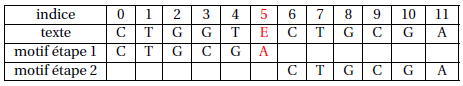

— Par exemple si au lieu de trouver un A en sixième position, un T est lu. Le T apparaît dans le motif CTGCGA (de longueur 6), on va alors effectuer un saut de 4 pour aligner le plus proche T du motif avec celui du texte.

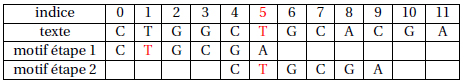

— Des cas plus complexes peuvent se produire lorsque certaines lettres coïncident, car le saut doit être calculé par rapport à l’indice de la lettre du motif. 
Par exemple si les deux lettres G et A coïncident, on teste celle en 4e position qui ne coïncide pas puisqu’on lit un T au lieu d’un C. Le T est dans le motif, on va effectuer un saut de 4-2 = 2 (4 la valeur dans la table de saut pour la lettre T et 2 le nombre de correspondance trouvée).  
Si ce calcul donne une valeur négative ou nulle, on effectuera un saut de 1.

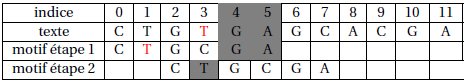

### Le prétraitement du motif.
— Cela signifie que l’algorithme "connaît" les caractères qui se trouvent dans le motif.  
— On va construire ce que l’on nomme une **table des sauts**, pour chaque caractère du motif. Cette table traduit en fait l’écart minimal entre une lettre du motif et la fin du motif. La dernière lettre du mot est traitée à part, elle renvoie un écart maximal si elle n’est pas présente ailleurs dans le mot.  

Par exemple pour le motif de longueur 6 : CTGCGA , la table des sauts sera :

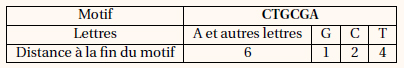

Par exemple pour le motif de longueur 6 : ATGCGA , la table des sauts sera :

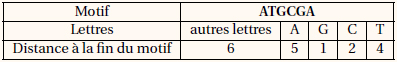

<div class="alert alert-info"><b>Exercice 4</b><br/>
    
Ecrivez la table de saut pour le motif : `CGGCAG` étudié dans l'exemple

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div> 
    
    
| Lettres | autres lettres | C | G | A |  
|-|-|-|-|-|
| Distance à la fin du motif | 6 | 2 | 3 | 1 |
    
En fait Le décalage suit la formule suivante :
`longueur du motif - position de la lettre dans le motif - 1`

### Implémentation

<div class="alert alert-info"><b>Exercice 5</b><br/>
    
1. Écrire une fonction qui donne la **table des sauts** d’un motif. Utiliser un dictionnaire dont les clés seront les
lettres du motif et les valeur le saut associé.  
2. Effectuer des tests appropriés.  
3. Faire tourner l’algorithme à la main sur quelques exemples.  

```    
Par exemple :
>>>motif='bonjour'
>>>table_sauts(motif)
{'b': 6, 'o': 2, 'n': 4, 'j': 3, 'u': 1}
>>>table_sauts('ACTGACTGACTG')
{'A': 3, 'C': 2, 'T': 1, 'G': 4}
```

In [ ]:
def table_boyer_moore(motif):
    d = [{} for i in range(len(motif))]
    for j in range(len(motif)):
        for k in range(j):
            d[j][motif[k]] = k
    return d
# Par exemple :
motif='bonjour'
print(table_boyer_moore(motif)) # {'b': 6, 'o': 2, 'n': 4, 'j': 3, 'u': 1}
print(table_boyer_moore('ACTGACTGACTG')) #{'A': 3, 'C': 2, 'T': 1, 'G': 4}

In [ ]:
def table_sauts(mot):
    table={}
    ...
        
    return table

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div>

```python
def table_sauts(mot):
    table={}
    for i in range(len(mot)-1):
        table[mot[i]]=len(mot)-i-1
    return table
```
    
</div>

In [ ]:
# Par exemple :
motif='bonjour'
print(table_sauts(motif)) # {'b': 6, 'o': 2, 'n': 4, 'j': 3, 'u': 1}
print(table_sauts('ACTGACTGACTG')) #{'A': 3, 'C': 2, 'T': 1, 'G': 4}

<div class="alert alert-info"><b>Exercice 6</b><br/>

On s'intéresse maintenant au programme de parcours. Son algorithme peut être résumé de la façon suivante :  
* Prétraitement du motif : réalisation de la table de sauts  
* On boucle jusqu'à la fin de la chaine  
 * On boucle sur le motif en partant de la fin tant qu'il y a correspondance 
  * Si on arrive à la fin du motif, le motif existe
  * Sinon, on regarde dans la table des sauts si la lettre est présente
   * Si la lettre est présente on effectue le saut correspondant (saut indiqué dans la table - nombre de correspondance)
   * Sinon, on effectue le saut maximal ( - nombre de correspondance éventuelle)
    
Complétez la fonction `boyer_moore_horspool(texte, motif)` qui prend en argument un `texte` et un `motif` et qui renvoie les indices des occurences de `motif` dans `texte` et `[]` sinon.

In [ ]:
#verion eleve
def boyer_moore_horspool(texte, motif):
    """
    Cherche un motif dans un texte
    Retourne Vrai si le motif est trouvé, faux sinon
    """
    indices = []
    i = 0 # indice de la chaine
    k = 0 # indice du motif
    
    # On crée la table des sauts
    sauts = ...
    
    # Si le motif est plus long que le texte on retourne False
    assert len(motif) < len(texte), "le motif doit être moins long que le texte"
    
    
    while i <= len(texte) - len(motif): # i doit permettre la recherche du motif jusqu'à la fin du texte
        # On commence à l'indice de la dernière lettre du motif
        k = ... 
        while ... > 0 and texte[...] == motif[...]: # conditions pour modifier k et donc avancer dans la recherche
            k -= ...
        if k == ... : # si on arrive au début du motif : la recherche est réussie
            if texte[...] == motif[...]: # on vérifie bien que la 1ère lettre du motif correspond à celle du texte
                indices.append(...)
            i += 1
        else:
            if texte[...] in sauts:
                # on calcule le saut
                # la valeur dans la table de saut pour la lettre trouvée moins le nombre de correspondance trouvée
                # Aide : le nombre de correspondance peut être exprimé en utilisant la valeur de k
                saut  = sauts[...] - (...)
                if saut > 0:
                    i += ... # i est modifié en fonction de la valeur du saut
                else:
                    i += len(motif) # i est modifié de la longueur du motif
            else:
                # i est modifié de la longueur du motif moins les correspondances trouvées précédemment
                i += len(motif) - (...) 
    
    return indices

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div>

```python
def boyer_moore_horspool(texte, motif):
    """
    Cherche un motif dans un texte
    Retourne les indices où le motif est trouvé
    """
    indices = []
    i = 0  # indice de la chaîne

    # On crée la table des sauts
    sauts = {}
    for j in range(len(motif) - 1):
        sauts[motif[j]] = len(motif) - 1 - j

    # Si le motif est plus long que le texte on retourne False
    assert len(motif) < len(texte), "le motif doit être moins long que le texte"

    while i <= len(texte) - len(motif):  # i doit permettre la recherche du motif jusqu'à la fin du texte
        k = len(motif) - 1  # On commence à l'indice de la dernière lettre du motif
        while k > 0 and texte[i + k] == motif[k]:  # conditions pour modifier k et donc avancer dans la recherche
            k -= 1
        if k == 0:  # si on arrive au début du motif : la recherche est presque réussie
            if texte[i] == motif[0]:  # on vérifie bien que la 1ère lettre du motif correspond à celle du texte
                indices.append(i)
            i += 1
        else:
            if texte[i + len(motif) - 1] in sauts:
                saut = sauts[texte[i + len(motif) - 1]] - (len(motif) - 1 - k)
                if saut > 0:
                    i += saut  # i est modifié en fonction de la valeur du saut
                else:
                    i += len(motif)
            else:
                i += len(motif) - k  # i est modifié de la longueur du motif moins les correspondances trouvées précédemment

    return indices

    
```
    
</div>

In [ ]:
def dico_lettres(mot):
    d = {}  #dictionnaire des lettre du motifs et leurs indices
    for i in ....:
        ...
    return d

def boyer_moore_horspool(texte, motif):
    dico = ...
    indices = []
    i = 0
    while i <= .... :
        k = len(motif)-1
        while ... >= 0 and texte[...] == motif[...]: #
            k -= ...
        if k == -1: #
            indices.append(i)
            i += 1 #
        else:
            if texte[....] in dico: #
                i += len(motif) - dico[...] - ... #
            else:
                i += len(motif) #

    return ....


<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Solution </summary>  
    
<div>

```python
def dico_lettres(mot):
    d = {}  # dictionnaire des lettres du motif et leurs indices
    for i in range(len(mot) - 1):  # on ignore le dernier caractère du motif
        d[mot[i]] = i  # on garde la dernière position de chaque lettre (sauf le dernier caractère)
    return d

def boyer_moore_horspool(texte, motif):
    dico = dico_lettres(motif)
    indices = []
    i = 0
    while i <= len(texte) - len(motif):
        k = len(motif) - 1
        while k >= 0 and texte[i + k] == motif[k]:  # comparaison depuis la fin
            k -= 1
        if k == -1:  # motif trouvé
            indices.append(i)
            i += 1  # on avance d'un caractère pour chercher le suivant
        else:
            if texte[i + len(motif) - 1] in dico:  # lettre fautive dans le dico ?
                i += len(motif) - dico[texte[i + len(motif) - 1]] - 1
            else:
                i += len(motif)  # pas dans le motif, on saute toute la longueur

    return indices

    
```
    
</div>

In [ ]:
texte = "Cueillez dès aujourd’hui les roses de la vie"
motif = "rose"
print(boyer_moore_horspool(texte, motif))

print(boyer_moore_horspool("une magnifique maison bleue", "maison"))
print(boyer_moore_horspool("une magnifique maison bleue", "saison"))

print(boyer_moore_horspool("une magnifique maison bleue", "nsi"))

print(boyer_moore_horspool("une magnifique maison bleue", "ma"))

### Gain de temps ???

Reprenons le code de mesure du temps de recherche sur les Fables de la Fontaine.  
**Que remarquez-vous ?**

In [ ]:
import time


with open('lafontaine.txt', 'r', encoding='utf-8-sig') as f:
    fables = f.read().replace('\n', ' ')


t0 = time.time()
motif = 'maison'
print(recherche_naive(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'maison'
print(boyer_moore_horspool(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'Desperat tractata nitescere posse relinquit'
print(recherche_naive(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'Desperat tractata nitescere posse relinquit'
print(boyer_moore_horspool(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'parcoursup'
print(recherche_naive(fables, motif))
print(time.time()-t0)

t0 = time.time()
motif = 'parcoursup'
print(boyer_moore_horspool(fables, motif))
print(time.time()-t0)

<div class="alert alert-info"><b>Exercice 7</b><br/>
    
Mesurer le temps d'exécution des 2 algorithmes de recherche textuelle : `naïf` et `Boyer-Moore-Horspool` en utilisant la chaine suivante : 
```    
CAATGTCTGCACCAAGACGCCGGCAGGTGCAGACCTTCGTTATAGGCGATGATTTCGAACCTACTAGTGGGTCTCTTAGGCCGAGCGGTTCCGAGAGATAGTGAAAGATGGCTGGGCTGTGAAGGGAAGGAGTCGTGAAAGCGCGAACACGAGTGTGCGCAAGCGCAGCGCCTTAGTATGCTCCAGTGTAGAAGCTCCGGCGTCCCGTCTAACCGTACGCTGTCCCCGGTACATGGAGCTAATAGGCTTTACTGCCCAATATGACCCCGCGCCGCGACAAAACAATAACAGTTT
```

Le motif `ACTGCC` existe dans la chaîne ce qui n'est pas le cas du motif `ACCTCG`

In [ ]:
from time import perf_counter

chaine="CAATGTCTGCACCAAGACGCCGGCAGGTGCAGACCTTCGTTATAGGCGATGATTTCGAACCTACTAGTGGGTCTCTTAGGCCGAGCGGTTCCGAGAGATAGTGAAAGATGGCTGGGCTGTGAAGGGAAGGAGTCGTGAAAGCGCGAACACGAGTGTGCGCAAGCGCAGCGCCTTAGTATGCTCCAGTGTAGAAGCTCCGGCGTCCCGTCTAACCGTACGCTGTCCCCGGTACATGGAGCTAATAGGCTTTACTGCCCAATATGACCCCGCGCCGCGACAAAACAATAACAGTTT"
#motif ="ACCTCG" # motif qui n'existe pas dans la chaine
motif ="ACTGCC" # motif qui existe dans la chaine

print("--- comparaison temps d'exécution ---")

pass

#### Exécutez les 3 cellules suivantes, que remarquez-vous quand au temps de calcul.

In [ ]:
from time import perf_counter

fichier = open('la_disparition.txt', 'r', encoding='utf-8-sig') 
roman = fichier.read()
fichier.close()


print("--- comparaison temps d'exécution ---")

debut=perf_counter()
print(recherche_naive(roman,"sourcil"))
fin=perf_counter()
print("Temps de calcul pour approche naïve : ")
print(fin-debut)


debut=perf_counter()
print(boyer_moore_horspool(roman, "sourcil"))
fin=perf_counter()
print("Temps de calcul pour approche Boyer-Moore: ")
print(fin-debut)

In [ ]:
from time import perf_counter

fichier = open('la_disparition.txt', 'r', encoding='utf-8-sig') 
roman = fichier.read()
fichier.close()


print("--- comparaison temps d'exécution ---")

debut=perf_counter()
print(recherche_naive(roman, "Mais il s'assombrit, fronçant son sourcil"))
fin=perf_counter()
print("Temps de calcul pour approche naïve : ")
print(fin-debut)


debut=perf_counter()
print(boyer_moore_horspool(roman, "Mais il s'assombrit, fronçant son sourcil"))
fin=perf_counter()
print("Temps de calcul pour approche Boyer-Moore: ")
print(fin-debut)

In [ ]:
from time import perf_counter

fichier = open('la_disparition.txt', 'r', encoding='utf-8-sig') 
roman = fichier.read()
fichier.close()

motif = "J'ai pu savoir tout au plus qu'on lui avait appris\nl'art du tambour, puis qu'il avait un jour\npris un brigantin qui cinglait sur Livorno, car\nson papa adoptif, natif d'Albinia, donc Toscan,\nvoulait, avant sa mort, jouir du panorama qui\navait ravi son antan..."

print("--- comparaison temps d'exécution ---")

debut=perf_counter()
print(recherche_naive(roman,motif))
fin=perf_counter()
print("Temps de calcul pour approche naïve : ")
print(fin-debut)


debut=perf_counter()
print(boyer_moore_horspool(roman, motif))
fin=perf_counter()
print("Temps de calcul pour approche Boyer-Moore: ")
print(fin-debut)

Le calcul précis de la **complexité de l’algorithme** précédent est difficile, et dépasse le niveau attendu en enseignement NSI.<br>
Il est cependant considéré comme un algorithme sous-linéaire : dans des cas favorables, les décalages de la fenêtre sont de l’ordre de la taille $M$ du motif. En fait, l’algorithme n’est même pas tenu de lire l’intégralité du texte : c’est la sous-linéarité.  
Dans les cas favorable, on peut donc estimer un coût de l’ordre de $\frac{T}{M}$.